In [1]:
#Κακιώνης Βασίλειος ΑΜ2981
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import sys

def changeToNewCoordinates(r,c):
    A = np.zeros([3,r*c])
    index=0
    for i in range(r):
        for j in range(c):
            A[0,index] = j-c/2
            A[1,index] = i-r/2
            A[2,index]=1
            index+=1
    return A

def changeToOldCoordinates(G,r,c):
    B = np.zeros([3,r*c])
    index=0
    for i in range(r*c):
        B[0,index] = G[0,index] + c/2
        B[1,index] = G[1,index] + r/2
        B[2,index] = 1
        index+=1
    return B
    
def calculateNearNeighbor(Tr,grid,oldImage,r,c):
    pos=0
    image = np.zeros([r,c])
    for i in range(r):
        for j in range(c):
            minDistance = 50000
            for k in range(r*c):  
                #Υπολγισμός της ελάχιστης ευκλείδιας απόστασης
                #για τον υπολογισμό του κοντινότερου γείτονα
                distanceX = (Tr[0][k]-i)**2
                distanceY = (Tr[1][k]-j)**2
                EuclideanDistance = (distanceX+distanceY)**(1/2)
                if EuclideanDistance < minDistance:
                    minDistance = EuclideanDistance
                    pos = k
            #Υπολογισμός της καινούργιας εικόνας που περιλαμβάνει 
            #και τις φωτεινότητες απο των κοντινότερων γειτόνων
            x = grid[0,pos]
            y = grid[1,pos]
            image[i][j]=oldImage[int(x)][int(y)]
    return image
    
          

rows =  101  columns =  101



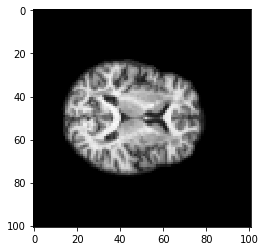

Taffine =  [[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]

First grid = 
[[-50.5 -49.5 -48.5 ...  47.5  48.5  49.5]
 [-50.5 -50.5 -50.5 ...  49.5  49.5  49.5]
 [  1.    1.    1.  ...   1.    1.    1. ]]

Transfomation = 
[[-50.5 -49.5 -48.5 ...  47.5  48.5  49.5]
 [-50.5 -50.5 -50.5 ...  49.5  49.5  49.5]
 [  1.    1.    1.  ...   1.    1.    1. ]]

New grid = 
[[  0.   1.   2. ...  98.  99. 100.]
 [  0.   0.   0. ... 100. 100. 100.]
 [  1.   1.   1. ...   1.   1.   1.]]

New Transformation = 
[[  0.   1.   2. ...  98.  99. 100.]
 [  0.   0.   0. ... 100. 100. 100.]
 [  1.   1.   1. ...   1.   1.   1.]]



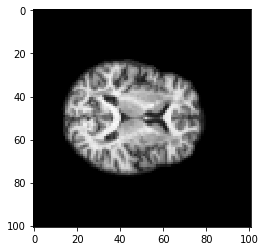

In [2]:
#Μετασχηματισμός της εικόνας στην ίδια εικόνα 

#Άνοιγμα της εικόνας, η αποθήκευση της,
#ο υπολογισμός γραμμών και στηλών της 
#και ο η εμφάνιση τους
filename = "brain.png"
firstImage = np.array(Image.open(filename))
rows,columns = firstImage.shape[0],firstImage.shape[1]
print("rows = ",rows," columns = ",columns)
print("") 
plt.imshow(firstImage,cmap="gray")
plt.show()

a1 = 1.0 
a2 = 0.0
a3 = 0.0 
a4 = 0.0
a5 = 1.0
a6 = 0.0

#Δημιουργία αφινικού πίνακα
T = np.array([[a1,a2,a3],[a4,a5,a6],[0,0,1]])
print("Taffine = ",T)
print("")

#Δημιουργία του καινούργιου πλέγματος συντεταγμένων [-50,50]
grid1 = np.zeros([3,rows*columns])
grid1 = changeToNewCoordinates(rows,columns)
print("First grid = ")
print(grid1)
print("")

#Μετασχηματισμός        
Transfomation = T@grid1
print("Transfomation = ")
print(Transfomation)
print("")

#Αλλαγή συντεταγμένων του κανούργιου πλέγματος στο παλιό [0,101]
newGrid = np.zeros([3,rows*columns])
newGrid = changeToOldCoordinates(grid1,rows,columns)
print("New grid = ")
print(newGrid)
print("")

#Αλλαγή συντεταγμένων του μετασχηματισμό στο παλιό πλέγμα [0,101]
newTransformation = np.zeros([3,rows*columns])
newTransformation = changeToOldCoordinates(Transfomation,rows,columns)
print("New Transformation = ")
print(newTransformation)
print("")

#Παρεμβολή του κοντινότερου γείτονα και δημιουργία της μετασχηματισμένης εικόνας
newImage = np.zeros([rows,columns])
newImage = calculateNearNeighbor(newTransformation,newGrid,firstImage,rows,columns)
plt.imshow(newImage,cmap="gray")
plt.show()
Image.fromarray(newImage.astype(np.uint8)).save("newBrain1.png")    

rows =  101  columns =  101



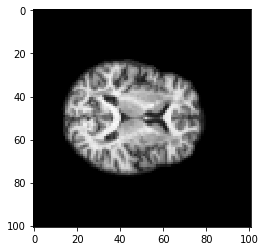

Taffine =  [[0.5 0.  0. ]
 [0.  0.5 0. ]
 [0.  0.  1. ]]

First grid = 
[[-50.5 -49.5 -48.5 ...  47.5  48.5  49.5]
 [-50.5 -50.5 -50.5 ...  49.5  49.5  49.5]
 [  1.    1.    1.  ...   1.    1.    1. ]]

Transfomation = 
[[-25.25 -24.75 -24.25 ...  23.75  24.25  24.75]
 [-25.25 -25.25 -25.25 ...  24.75  24.75  24.75]
 [  1.     1.     1.   ...   1.     1.     1.  ]]

New grid = 
[[  0.   1.   2. ...  98.  99. 100.]
 [  0.   0.   0. ... 100. 100. 100.]
 [  1.   1.   1. ...   1.   1.   1.]]

New Transformation = 
[[25.25 25.75 26.25 ... 74.25 74.75 75.25]
 [25.25 25.25 25.25 ... 75.25 75.25 75.25]
 [ 1.    1.    1.   ...  1.    1.    1.  ]]



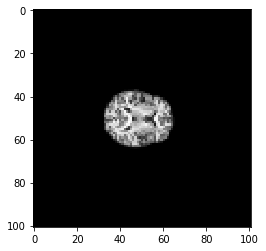

In [3]:
#Μετασχηματισμός της εικόνας σε σμίκρυνση της κατά το μισό μέγεθος

#Άνοιγμα της εικόνας, η αποθήκευση της,
#ο υπολογισμός γραμμών και στηλών της 
#και ο η εμφάνιση τους
filename = "brain.png"
firstImage = np.array(Image.open(filename))
rows,columns = firstImage.shape[0],firstImage.shape[1]
print("rows = ",rows," columns = ",columns)
print("") 
plt.imshow(firstImage,cmap="gray")
plt.show()

a1 = 0.5
a2 = 0.0 
a3 = 0.0 
a4 = 0.0 
a5 = 0.5 
a6 = 0.0

#Δημιουργία αφινικού πίνακα
T = np.array([[a1,a2,a3],[a4,a5,a6],[0,0,1]])
print("Taffine = ",T)
print("")

#Δημιουργία του καινούργιου πλέγματος συντεταγμένων [-50,50]
grid1 = np.zeros([3,rows*columns])
grid1 = changeToNewCoordinates(rows,columns)
print("First grid = ")
print(grid1)
print("")

#Μετασχηματισμός        
Transfomation = T@grid1
print("Transfomation = ")
print(Transfomation)
print("")

#Αλλαγή συντεταγμένων του κανούργιου πλέγματος στο παλιό [0,101]
newGrid = np.zeros([3,rows*columns])
newGrid = changeToOldCoordinates(grid1,rows,columns)
print("New grid = ")
print(newGrid)
print("")

#Αλλαγή συντεταγμένων του μετασχηματισμό στο παλιό πλέγμα [0,101]
newTransformation = np.zeros([3,rows*columns])
newTransformation = changeToOldCoordinates(Transfomation,rows,columns)
print("New Transformation = ")
print(newTransformation)
print("")

#Παρεμβολή του κοντινότερου γείτονα και δημιουργία της μετασχηματισμένης εικόνας
newImage = np.zeros([rows,columns])
newImage = calculateNearNeighbor(newTransformation,newGrid,firstImage,rows,columns)
plt.imshow(newImage,cmap="gray")
plt.show()
Image.fromarray(newImage.astype(np.uint8)).save("newBrain2.png")    

rows =  101  columns =  101



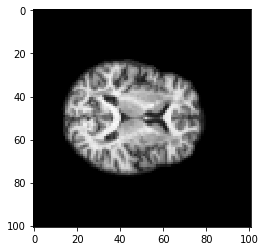

Taffine =  [[1.5 0.  0. ]
 [0.  1.5 0. ]
 [0.  0.  1. ]]

First grid = 
[[-50.5 -49.5 -48.5 ...  47.5  48.5  49.5]
 [-50.5 -50.5 -50.5 ...  49.5  49.5  49.5]
 [  1.    1.    1.  ...   1.    1.    1. ]]

Transfomation = 
[[-75.75 -74.25 -72.75 ...  71.25  72.75  74.25]
 [-75.75 -75.75 -75.75 ...  74.25  74.25  74.25]
 [  1.     1.     1.   ...   1.     1.     1.  ]]

New grid = 
[[  0.   1.   2. ...  98.  99. 100.]
 [  0.   0.   0. ... 100. 100. 100.]
 [  1.   1.   1. ...   1.   1.   1.]]

New Transformation = 
[[-25.25 -23.75 -22.25 ... 121.75 123.25 124.75]
 [-25.25 -25.25 -25.25 ... 124.75 124.75 124.75]
 [  1.     1.     1.   ...   1.     1.     1.  ]]



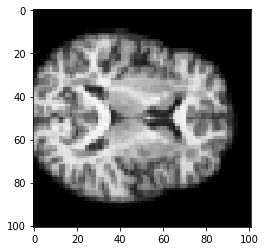

In [4]:
#Μετασχηματισμός της εικόνας σε μεγέθυνση της κατά το μισό μέγεθος

#Άνοιγμα της εικόνας, η αποθήκευση της,
#ο υπολογισμός γραμμών και στηλών της 
#και ο η εμφάνιση τους
filename = "brain.png"
firstImage = np.array(Image.open(filename))
rows,columns = firstImage.shape[0],firstImage.shape[1]
print("rows = ",rows," columns = ",columns)
print("") 
plt.imshow(firstImage,cmap="gray")
plt.show()

a1 = 1.5
a2 = 0.0 
a3 = 0.0 
a4 = 0.0 
a5 = 1.5 
a6 = 0.0 

#Δημιουργία αφινικού πίνακα
T = np.array([[a1,a2,a3],[a4,a5,a6],[0,0,1]])
print("Taffine = ",T)
print("")

#Δημιουργία του καινούργιου πλέγματος συντεταγμένων [-50,50]
grid1 = np.zeros([3,rows*columns])
grid1 = changeToNewCoordinates(rows,columns)
print("First grid = ")
print(grid1)
print("")

#Μετασχηματισμός        
Transfomation = T@grid1
print("Transfomation = ")
print(Transfomation)
print("")

#Αλλαγή συντεταγμένων του κανούργιου πλέγματος στο παλιό [0,101]
newGrid = np.zeros([3,rows*columns])
newGrid = changeToOldCoordinates(grid1,rows,columns)
print("New grid = ")
print(newGrid)
print("")

#Αλλαγή συντεταγμένων του μετασχηματισμό στο παλιό πλέγμα [0,101]
newTransformation = np.zeros([3,rows*columns])
newTransformation = changeToOldCoordinates(Transfomation,rows,columns)
print("New Transformation = ")
print(newTransformation)
print("")

#Παρεμβολή του κοντινότερου γείτονα και δημιουργία της μετασχηματισμένης εικόνας
newImage = np.zeros([rows,columns])
newImage = calculateNearNeighbor(newTransformation,newGrid,firstImage,rows,columns)
plt.imshow(newImage,cmap="gray")
plt.show()
Image.fromarray(newImage.astype(np.uint8)).save("newBrain3.png")    

rows =  101  columns =  101



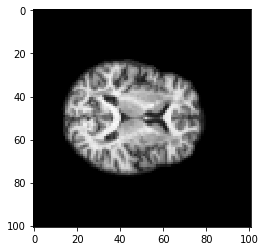

Taffine =  [[ 0. -1.  0.]
 [ 1.  0.  0.]
 [ 0.  0.  1.]]

First grid = 
[[-50.5 -49.5 -48.5 ...  47.5  48.5  49.5]
 [-50.5 -50.5 -50.5 ...  49.5  49.5  49.5]
 [  1.    1.    1.  ...   1.    1.    1. ]]

Transfomation = 
[[ 50.5  50.5  50.5 ... -49.5 -49.5 -49.5]
 [-50.5 -49.5 -48.5 ...  47.5  48.5  49.5]
 [  1.    1.    1.  ...   1.    1.    1. ]]

New grid = 
[[  0.   1.   2. ...  98.  99. 100.]
 [  0.   0.   0. ... 100. 100. 100.]
 [  1.   1.   1. ...   1.   1.   1.]]

New Transformation = 
[[101. 101. 101. ...   1.   1.   1.]
 [  0.   1.   2. ...  98.  99. 100.]
 [  1.   1.   1. ...   1.   1.   1.]]



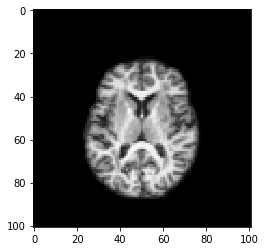

In [5]:
#Περιστροφή της εικόνας κατά 90 μοίρες

#Άνοιγμα της εικόνας, η αποθήκευση της,
#ο υπολογισμός γραμμών και στηλών της 
#και ο η εμφάνιση τους
filename = "brain.png"
firstImage = np.array(Image.open(filename))
rows,columns = firstImage.shape[0],firstImage.shape[1]
print("rows = ",rows," columns = ",columns)
print("") 
plt.imshow(firstImage,cmap="gray")
plt.show()

a1 = 0.0
a2 = -1.0 
a3 = 0.0 
a4 = 1.0 
a5 = 0.0 
a6 = 0.0 

#Δημιουργία αφινικού πίνακα
T = np.array([[a1,a2,a3],[a4,a5,a6],[0,0,1]])
print("Taffine = ",T)
print("")

#Δημιουργία του καινούργιου πλέγματος συντεταγμένων [-50,50]
grid1 = np.zeros([3,rows*columns])
grid1 = changeToNewCoordinates(rows,columns)
print("First grid = ")
print(grid1)
print("")

#Μετασχηματισμός        
Transfomation = T@grid1
print("Transfomation = ")
print(Transfomation)
print("")

#Αλλαγή συντεταγμένων του κανούργιου πλέγματος στο παλιό [0,101]
newGrid = np.zeros([3,rows*columns])
newGrid = changeToOldCoordinates(grid1,rows,columns)
print("New grid = ")
print(newGrid)
print("")

#Αλλαγή συντεταγμένων του μετασχηματισμό στο παλιό πλέγμα [0,101]
newTransformation = np.zeros([3,rows*columns])
newTransformation = changeToOldCoordinates(Transfomation,rows,columns)
print("New Transformation = ")
print(newTransformation)
print("")

#Παρεμβολή του κοντινότερου γείτονα και δημιουργία της μετασχηματισμένης εικόνας
newImage = np.zeros([rows,columns])
newImage = calculateNearNeighbor(newTransformation,newGrid,firstImage,rows,columns)
plt.imshow(newImage,cmap="gray")
plt.show()
Image.fromarray(newImage.astype(np.uint8)).save("newBrain4.png")    

rows =  101  columns =  101



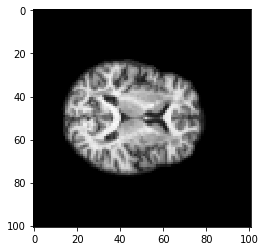

Taffine =  [[ 1.  0. 15.]
 [ 0.  1. 15.]
 [ 0.  0.  1.]]

First grid = 
[[-50.5 -49.5 -48.5 ...  47.5  48.5  49.5]
 [-50.5 -50.5 -50.5 ...  49.5  49.5  49.5]
 [  1.    1.    1.  ...   1.    1.    1. ]]

Transfomation = 
[[-35.5 -34.5 -33.5 ...  62.5  63.5  64.5]
 [-35.5 -35.5 -35.5 ...  64.5  64.5  64.5]
 [  1.    1.    1.  ...   1.    1.    1. ]]

New grid = 
[[  0.   1.   2. ...  98.  99. 100.]
 [  0.   0.   0. ... 100. 100. 100.]
 [  1.   1.   1. ...   1.   1.   1.]]

New Transformation = 
[[ 15.  16.  17. ... 113. 114. 115.]
 [ 15.  15.  15. ... 115. 115. 115.]
 [  1.   1.   1. ...   1.   1.   1.]]



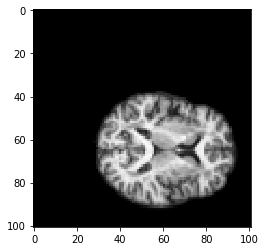

In [6]:
#Μετασχηματισμός της εικόνας στην ίδια εικόνα με
#μετατόπιση κατά 15 στους άξονες x,y

#Άνοιγμα της εικόνας, η αποθήκευση της,
#ο υπολογισμός γραμμών και στηλών της 
#και ο η εμφάνιση τους
filename = "brain.png"
firstImage = np.array(Image.open(filename))
rows,columns = firstImage.shape[0],firstImage.shape[1]
print("rows = ",rows," columns = ",columns)
print("") 
plt.imshow(firstImage,cmap="gray")
plt.show()

a1 = 1.0 
a2 = 0.0
a3 = 15.0 
a4 = 0.0
a5 = 1.0
a6 = 15.0

#Δημιουργία αφινικού πίνακα
T = np.array([[a1,a2,a3],[a4,a5,a6],[0,0,1]])
print("Taffine = ",T)
print("")

#Δημιουργία του καινούργιου πλέγματος συντεταγμένων [-50,50]
grid1 = np.zeros([3,rows*columns])
grid1 = changeToNewCoordinates(rows,columns)
print("First grid = ")
print(grid1)
print("")

#Μετασχηματισμός        
Transfomation = T@grid1
print("Transfomation = ")
print(Transfomation)
print("")

#Αλλαγή συντεταγμένων του κανούργιου πλέγματος στο παλιό [0,101]
newGrid = np.zeros([3,rows*columns])
newGrid = changeToOldCoordinates(grid1,rows,columns)
print("New grid = ")
print(newGrid)
print("")

#Αλλαγή συντεταγμένων του μετασχηματισμό στο παλιό πλέγμα [0,101]
newTransformation = np.zeros([3,rows*columns])
newTransformation = changeToOldCoordinates(Transfomation,rows,columns)
print("New Transformation = ")
print(newTransformation)
print("")

#Παρεμβολή του κοντινότερου γείτονα και δημιουργία της μετασχηματισμένης εικόνας
newImage = np.zeros([rows,columns])
newImage = calculateNearNeighbor(newTransformation,newGrid,firstImage,rows,columns)
plt.imshow(newImage,cmap="gray")
plt.show()
Image.fromarray(newImage.astype(np.uint8)).save("newBrain5.png")    